# Introdução
Este notebook consiste na análise exploratória de dados (EDA) referente ao dataset "Gas Prices in Brazil", extraído do Kaggle. O dataset abrange o período de 2004 até 2021 e tem como base os dados dos relatórios divulgados pela Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP). 

Traremos os seguintes insights através dos dados:

1. Como os preços dos produtos se comportaram ao longo dos anos?
2. Como diferentes regiões do Brasil viram os preços mudarem?
2. Qual é a mínima e máxima histórica de preço por produto por estado?

Tipos de Produtos:
* Etanol Hidratado
* Gás Natural Veicular (GNV)
* Gás Liquefeito de Petróleo (GLP) – Gás de Cozinha - Botijão de 13 quilos
* Gasolina Comum
* Gasolina Aditivada
* Óleo Diesel
* Óleo Diesel S-10 -> *Foi adicionado depois*

Observações importantes:
Até 30 de outubro de 2004, todos os preços médios eram calculados por média aritmética simples. Após esta data, os preços médios de revenda e de distribuição de combustíveis, em nível estadual, regional e nacional, passaram a ser ponderados com base nas informações de vendas enviadas pelas distribuidoras à ANP. Atualmente, apenas o preço médio em nível municipal é obtido por média aritmética simples. Portanto devemos analisar apenas os dados fornecidos a partir do dia 31/10/2004.

Os valores NULL foram substituídos pelo valor -99999 pelo dono do dataset.

Fonte: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil

Autores do projeto: Cicero Junior, Manusa Leal, Márcia Freitas, Nathalia Martins, Raphael Ferreira.

In [1]:
#Importando as Bibliotecas que serão utilizadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pré Análise e Limpeza

In [2]:
#Abrindo a base de dados .csv
df_base= pd.read_csv('base_2004_2021.csv')

#Realizando uma rápida observação dos dados
df_base.head(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.1,0.068,0.7332,1.294,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.2972,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.3541,0.096


In [3]:
#Analisando os tipos de variáveis das colunas e se elas possuem valores vazios
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Algumas colunas deveriam ser do tipo float, mas são do tipo object. Provavelmente devem ter valores nulos (-99999) e/ou demais caracteres que estão poluíndo a base. 

In [4]:
#Realizando uma visualização geral dos dados em ordem crescente de valor para 
#identificar os possíveis caracteres 
df_base.sort_values(by=['MARGEM MÉDIA REVENDA'])

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
40329,2009-04-12,2009-04-18,CENTRO OESTE,MATO GROSSO DO SUL,GNV,8,R$/m3,1.749,0.018,1.749,1.799,-,0.010,-,-,-,-,-
74045,2015-04-19,2015-04-25,SUL,PARANA,GNV,6,R$/m3,2.120,0.160,1.999,2.396,-,0.075,-,-,-,-,-
74050,2015-04-19,2015-04-25,SUL,SANTA CATARINA,GNV,43,R$/m3,2.101,0.125,1.960,2.630,-,0.059,-,-,-,-,-
74055,2015-04-26,2015-05-02,NORTE,AMAPA,ETANOL HIDRATADO,1,R$/l,3.100,0.000,3.100,3.100,-,0.000,-,-,-,-,-
11970,2012-12-02,2012-12-08,NORTE,AMAPA,ETANOL HIDRATADO,9,R$/l,2.286,0.080,2.180,2.450,-,0.035,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71730,2015-01-04,2015-01-10,CENTRO OESTE,MATO GROSSO,GLP,107,R$/13Kg,55.449,4.651,45.000,67.000,9.997,0.084,45.452,2.121,44,47,0.047
81778,2016-04-17,2016-04-23,NORDESTE,PARAIBA,GLP,81,R$/13Kg,51.239,3.621,42.000,55.000,9.997,0.071,41.242,4.832,33.59,47,0.117
32246,2010-03-07,2010-03-13,NORTE,TOCANTINS,GLP,73,R$/13Kg,44.264,1.417,40.000,48.000,9.999,0.032,34.265,1.821,30,38.7,0.053
34752,2011-12-18,2011-12-24,NORTE,AMAPA,GLP,26,R$/13Kg,43.366,4.047,40.000,58.000,9.999,0.093,33.367,0.153,33.2,33.5,0.005


In [5]:
#Realizando uma visualização geral dos dados
df_base.tail(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Deste modo temos o -99999 e o "-" poluindo a base. Vamos alterá-los para Nulos e assim visualizar a quantidade:

In [6]:
#Copiando o df_base para um novo df por segurança
df=df_base.copy()

#Substituindo os valores poluentes por NaN (Not A Number)
df=df.replace({'-99999.0': np.NaN, '-99999': np.NaN, '-': np.NaN})

In [7]:
#Analisando os tipos de variáveis das colunas e se elas possuem valores vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [8]:
#Contando a quantidade de vazios 
df.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

In [9]:
#Verificando os tipos de Produtos antes da limpeza
df['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

São as colunas que possuem valores vazios: 
* "MARGEM MÉDIA REVENDA"
* "PREÇO MÉDIO DISTRIBUIÇÃO"
* "DESVIO PADRÃO DISTRIBUIÇÃO"
* "PREÇO MÍNIMO DISTRIBUIÇÃO"
* "PREÇO MÁXIMO DISTRIBUIÇÃO"
* "COEF DE VARIAÇÃO DISTRIBUIÇÃO"

In [10]:
#Vendo a % que os vazios representam no dataset 
print(f'Representação de vazios no dataset: {np.round((8948/np.shape(df)[0])*100,2)} %')

Representação de vazios no dataset: 7.41 %


Agora temos o valor real de valores nulos no nosso dataset e podemos comparar em relação a nossa quantidade total de dados do dataset. Como a "MARGEM MÉDIA REVENDA" possui valores a mais nulos que as demais colunas com valores nulos, utilizamos ela como referência. 

Os valores nulos representam apenas 7,41 % dos dados em relação ao nosso dataset, que possui 120.823 no total. Portanto iremos excluir estes dados, visto que representam uma quantidade baixa em relação ao dataset total.

In [11]:
#Pegando todos os índices vazios, utilizando como referência a coluna 
#'MARGEM MÉDIA REVENDA' por ter o maior número de valores vazios.
indices=df[df['MARGEM MÉDIA REVENDA'].isna()].index.tolist()

#Excluíndo os vazios do dataset utilizando os índices do passo anterior
df=df.drop(indices, axis=0)

Agora podemos transformar as colunas "MARGEM MÉDIA REVENDA", "PREÇO MÉDIO DISTRIBUIÇÃO", "DESVIO PADRÃO DISTRIBUIÇÃO", "PREÇO MÍNIMO DISTRIBUIÇÃO", "PREÇO MÁXIMO DISTRIBUIÇÃO" e "COEF DE VARIAÇÃO DISTRIBUIÇÃO" para valores numéricos.

In [12]:
#Passando as colunas para valores numéricos após a exclusão dos vazios
df['MARGEM MÉDIA REVENDA']=pd.to_numeric(df['MARGEM MÉDIA REVENDA'])
df['PREÇO MÉDIO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÉDIO DISTRIBUIÇÃO'])
df['PREÇO MÍNIMO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÍNIMO DISTRIBUIÇÃO'])
df['PREÇO MÁXIMO DISTRIBUIÇÃO']=pd.to_numeric(df['PREÇO MÁXIMO DISTRIBUIÇÃO'])
df['DESVIO PADRÃO DISTRIBUIÇÃO']=pd.to_numeric(df['DESVIO PADRÃO DISTRIBUIÇÃO'])
df['COEF DE VARIAÇÃO DISTRIBUIÇÃO']=pd.to_numeric(df['COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [13]:
#Substituindo os valores vazios pela mediana
#df["MARGEM MÉDIA REVENDA"].fillna(df["MARGEM MÉDIA REVENDA"].median(), inplace=True)
#df["PREÇO MÉDIO DISTRIBUIÇÃO"].fillna(df["PREÇO MÉDIO DISTRIBUIÇÃO"].median(),inplace=True)
#df["DESVIO PADRÃO DISTRIBUIÇÃO"].fillna(df["DESVIO PADRÃO DISTRIBUIÇÃO"].median(),inplace=True)
#df["PREÇO MÍNIMO DISTRIBUIÇÃO"].fillna(df["PREÇO MÍNIMO DISTRIBUIÇÃO"].median(),inplace=True)
#df["PREÇO MÁXIMO DISTRIBUIÇÃO"].fillna(df["PREÇO MÁXIMO DISTRIBUIÇÃO"].median(),inplace=True)
#df["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].fillna(df["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].median(),inplace=True)

In [14]:
#Analisando se todas as colunas possuem o mesmo tamanho após a substituição dos vazios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA       1118

In [15]:
#Verificando se ainda há valores nulos
df.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA       1118

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA       1118

Agora que limpamos a nossa base, ficando com 111.875 dados, falta apenas filtrarmos os dados a partir do dia 31/10/2004 para considerarmos apenas a média aritmética ponderada, conforme explicado na introdução deste notebook.

In [18]:
#Transformando a coluna 'DATA INICIAL' para datetime p/ poder utilizar 
#como filtro de data
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], format='%Y-%m-%d')

#Utilizando a 'DATA INICIAL' para filtrar valores maiores que 30/10/2004
df=df.loc[(df['DATA INICIAL']>'2004-10-30')]
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
675,2004-10-31,2004-11-06,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,146,R$/l,1.632,0.088,1.27,1.850,0.392,0.054,1.240,0.127,0.90510,1.6527,0.102
676,2004-10-31,2004-11-06,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,378,R$/l,1.412,0.123,1.20,1.799,0.311,0.087,1.101,0.091,0.87301,1.4579,0.083
677,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,195,R$/l,1.692,0.091,1.45,1.890,0.397,0.054,1.295,0.077,1.05000,1.6271,0.059
678,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,172,R$/l,1.626,0.066,1.37,1.785,0.403,0.041,1.223,0.114,0.94670,1.4600,0.093
679,2004-10-31,2004-11-06,NORDESTE,ALAGOAS,ETANOL HIDRATADO,98,R$/l,1.479,0.053,1.36,1.630,0.177,0.036,1.302,0.077,1.05020,1.4047,0.059


Para finalizarmos esta parte, falta apenas desmembrar as colunas de datas para facilitar o plot de gráficos.

In [19]:
#Analisando a data, seria interessante trabalhar com o dia, mês e ano em colunas separadas para facilitar a análise e plot.

#Novas colunas com o dia, mês e ano baseadas na coluna "DATA INICIAL" e "DATA FINAL"
dia_inicial=pd.DatetimeIndex(df['DATA INICIAL']).day
dia_final=pd.DatetimeIndex(df['DATA FINAL']).day

mes_inicial=pd.DatetimeIndex(df['DATA INICIAL']).month
mes_final=pd.DatetimeIndex(df['DATA FINAL']).month

ano_inicial=pd.DatetimeIndex(df['DATA INICIAL']).year
ano_final=pd.DatetimeIndex(df['DATA FINAL']).year

#Adicionando as colunas no DataFrame
df=df.assign(dia_inicial=dia_inicial, mes_inicial=mes_inicial, ano_inicial=ano_inicial, dia_final=dia_final, mes_final=mes_final, ano_final=ano_final)

Agora vamos verificar se os produtos estão com os nomes corretos

In [20]:
df['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM      22090
ETANOL HIDRATADO    21647
GLP                 21251
ÓLEO DIESEL         20479
GNV                 11220
ÓLEO DIESEL S10      8927
OLEO DIESEL S10      1595
OLEO DIESEL          1592
Name: count, dtype: int64

Após a limpeza, os dados da Gasolina Aditivada foram removidos, mas a quantidade de dados era muito baixa comparado aos demais (apenas 749 dados). 

Temos o Óleo Diesel com duas variações, tanto para o Óleo Diesel quanto para o ÓLEO DIESEL S10. Vamos ajustar isto. 

In [21]:
#Substituindo 'OLEO DIESEL S10' -> 'ÓLEO DIESEL S10'
df=df.replace('OLEO DIESEL S10', 'ÓLEO DIESEL S10')

#Substituindo 'OLEO DIESEL' -> 'ÓLEO DIESEL'
df=df.replace('OLEO DIESEL', 'ÓLEO DIESEL')

In [22]:
#Verificando novamente os nomes dos produtos após o replace
df['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM      22090
ÓLEO DIESEL         22071
ETANOL HIDRATADO    21647
GLP                 21251
GNV                 11220
ÓLEO DIESEL S10     10522
Name: count, dtype: int64

In [23]:
#Verificando o tamanho final do nosso dataset após a limpeza
df.shape

(108801, 24)

Ao final da limpeza e demais manipulações, finalizamos esta etapa com 108.801 linhas e 24 colunas.

## Análise dos dados

### Distribuição de dados por Região, Estado e Produto

In [24]:
#Verificando as colunas existentes no dataset
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'dia_inicial', 'mes_inicial', 'ano_inicial', 'dia_final', 'mes_final',
       'ano_final'],
      dtype='object')

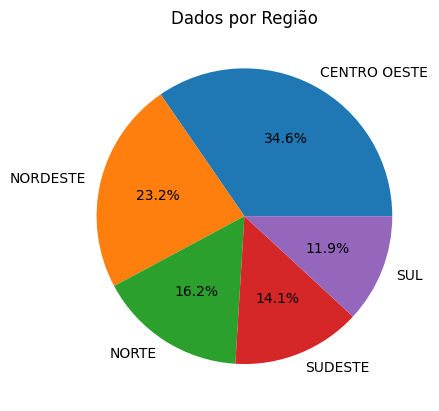

In [25]:
#Dados por Região

#Label Região
regiao=np.unique(df['REGIÃO'])

#Plot dos dados por Região
fig, ax = plt.subplots()
ax.pie(df['REGIÃO'].value_counts(), labels=regiao, autopct='%1.1f%%')
plt.title("Dados por Região")
plt.show()

A região que mais possui representatividade de dados é a região Centro Oeste e Nordeste, sendo que a Região Centro Oeste é a que possui o maior percentual dentre todas.

In [26]:
#Dados por Estado

#Label Estado
#estado=np.unique(df['ESTADO'])

#Plot dos dados por Estados
#fig, ax = plt.subplots()
#ax.pie(df['ESTADO'].value_counts(), labels=estado, textprops={'fontsize':7}, autopct='%1.1f%%')
#plt.title("Dados por Estado")
#plt.show()

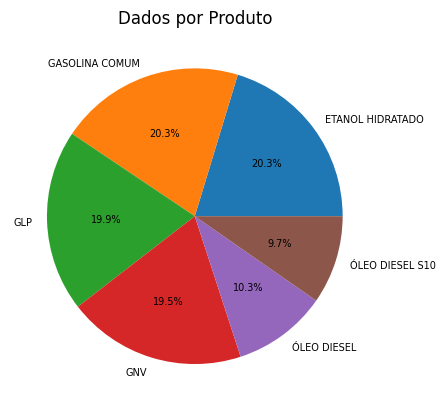

In [27]:
#Dados por Produto

#Label Produto
produto=np.unique(df['PRODUTO'])

#Plot dos dados por Produto
fig, ax = plt.subplots()
ax.pie(df['PRODUTO'].value_counts(), labels=produto, textprops={'fontsize':7}, autopct='%1.1f%%')
plt.title("Dados por Produto")
plt.show()

O dataset possui mais representatividade de dados dos produtos de Gasolina Comum, seguido pelo Etanol Hidratado, GLP e GNV,  e Óleo Diesel.

Agora vamos verificar a unidade de medida destes produtos

In [28]:
#Verificando a unidade de medida destes produtos
df.groupby(['UNIDADE DE MEDIDA','PRODUTO'])['PRODUTO'].value_counts()

UNIDADE DE MEDIDA  PRODUTO         
R$/13Kg            GLP                 21251
R$/l               ETANOL HIDRATADO    21647
                   GASOLINA COMUM      22090
                   ÓLEO DIESEL         22071
                   ÓLEO DIESEL S10     10522
R$/m3              GNV                 11220
Name: count, dtype: int64

Não é possível fazer uma análise juntando todos os produtos, pois eles possuem unidades de medidas diferentes.

### Insights e Análise sobre os Dados

C:\Users\manus\AppData\Local\Temp\ipykernel_15204\3851990657.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


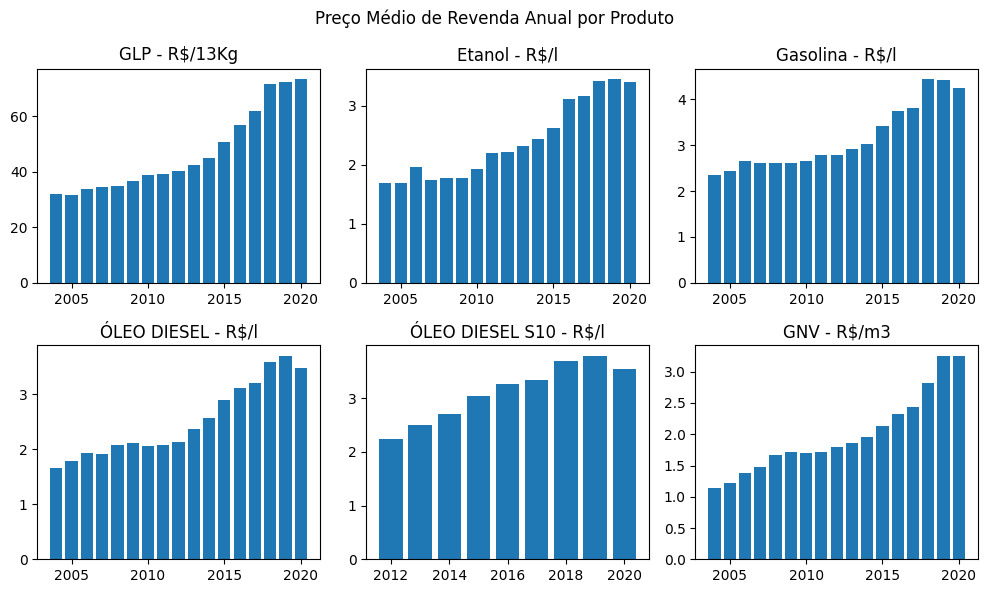

In [29]:
#Preço Médio de Revenda Anual por Produto - Plot 
glp=df.loc[df['PRODUTO'] == 'GLP']     
etanol=df.loc[df['PRODUTO'] == 'ETANOL HIDRATADO']        
gasolina=df.loc[df['PRODUTO'] == 'GASOLINA COMUM']
diesel=df.loc[df['PRODUTO'] == 'ÓLEO DIESEL']
diesels10=df.loc[df['PRODUTO'] == 'ÓLEO DIESEL S10']
gnv=df.loc[df['PRODUTO'] == 'GNV']

#Variável criada para deixar o eixo x no tipo int
anos=np.unique(df['ano_inicial'])

#s10 precisa de outro xlabel porque começou a ser vendido em 2012
anos_ds10=np.unique(diesels10['ano_inicial'])

#Plot dos gráficos
fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual por Produto')

axs[0,0].bar(anos,glp.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0,0].set_title('GLP - R$/13Kg')

axs[0, 1].bar(anos,etanol.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0, 1].set_title('Etanol - R$/l')

axs[0, 2].bar(anos,gasolina.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[0, 2].set_title('Gasolina - R$/l')

axs[1, 0].bar(anos,diesel.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')

axs[1, 1].bar(anos_ds10,diesels10.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')

axs[1, 2].bar(anos,gnv.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean())
axs[1, 2].set_title('GNV - R$/m3')

plt.tight_layout()
plt.show()

Historicamente, os preços médios de GLP, Etanol e Óleo Diesel S10 possuem um crescimento semelhante a partir de 2012, sendo que no período de 2017 a 2020 esse preço se estabiliza. Porém, Gasolina, Óleo Diesel e GNV crescem de forma quase linear em que, principalmente, a partir de 2017 há uma taxa de aumento de 16,52%, 12,14% e 15,32%, respectivamente. Agora vamos fazer uma analise um pouco mais direcionada para os seguintes produtos:

1. *GNV:* Nota-se que a partir de 2015, o preço médio de Revenda Anual de GNV cresce de forma quase linear. No ano de 2018, os dados apresentam um crescimento de 15,32% de aumento em relação a 2017 e 15,36% em relação ao ano de 2019. Entre 2019 e 2020 existe uma pequena redução que faz com que o preço quase se mantenha costante.

Taxa de crescimento: 
* (2017-2018): 15,32%;
* (2018-2019): 15,36%;
* (2019-2020): -2,59%.

O valor do GNV em 2017 era de 
* Em 2018 foi de R$2,84;
* Em 2019 foi de R$3,28; 
* Em 2020 foi de R$3,19.

2. *Gasolina Comum:* possui uma distribuição mais irregular. Nos períodos de 2014 a 2017, é visto que há um crescimento linear, mas os anos de 2018, 2019 e 2020 possuem picos que crescem e decrescem ano após ano. Nesse gráfico conseguimos ver nitidamente o efeito do contexto. Em 2017, a Petrobrás mudou a política de preços.

3. *Óleo Diesel:* possui uma distribuição similar a de Gasolina, onde os anos a partir de 2014 possuem um crescimento linear, mas o período a partir de 2018 começa a apresentar picos irregulares, onde em 2019 se apresenta, historicamente, com o maior preço médio de óleo diesel. Em 2020, houve uma queda de preços: o diesel reduziu, em nossos dados, 5.16%, saindo de R$3,71 para R$3,52, em média.

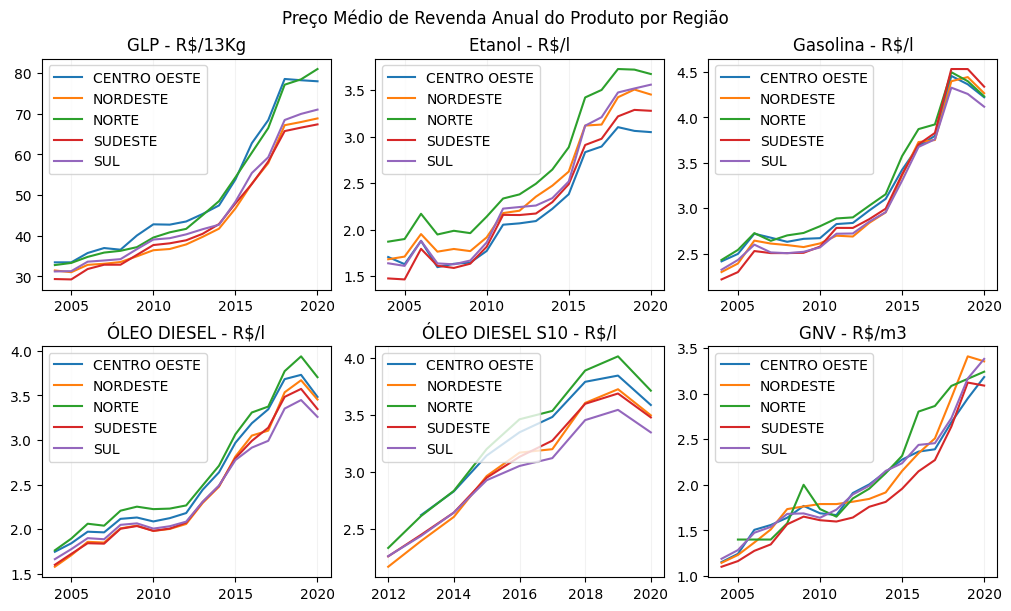

In [30]:
#Preço Médio de Revenda Anual do Produto por Região

#Label Regiões
regioes=np.unique(df['REGIÃO'])

#Plotando os gráficos
fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual do Produto por Região')

axs[0,0].plot(glp.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0,0].set_title('GLP - R$/13Kg')
axs[0,0].legend(loc='upper left')
axs[0,0].grid(axis='x', color='0.95')

axs[0, 1].plot(etanol.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 1].set_title('Etanol - R$/l')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(axis='x', color='0.95')

axs[0, 2].plot(gasolina.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[0, 2].set_title('Gasolina - R$/l')
axs[0, 2].legend(loc='upper left')
axs[0, 2].grid(axis='x', color='0.95')

axs[1, 0].plot(diesel.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(axis='x', color='0.95')

axs[1, 1].plot(diesels10.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(axis='x', color='0.95')

axs[1, 2].plot(gnv.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
axs[1, 2].set_title('GNV - R$/m3')
axs[1, 2].legend(loc='upper left')
axs[1, 2].grid(axis='x', color='0.95')



Ao comparar os preços médio por produto em cada região, é notável que o GLP, a Gasolina, o Óleo Diesel e Óleo Diesel S10 se apresentam como produtos que o preço médio cresce de forma conjunta em todas as regiões. Já o Etanol o gráfico mostra que a região Norte do país tem o historicamente o preço mais caro. O GNV, os preços médios oscilam demonstrando que há uma interferência regional nesses preços.

1. *GLP:* Apesar da taxa de crescimento semelhante entre as regiões, o GLP sempre esteve mais caro no Norte e Centro Oeste do país.
2. *GNV:* "As tarifas ao consumidor são aprovadas pelas agências reguladoras estaduais, conforme legislação e regulação específicas”, informou a Petrobrás.

C:\Users\manus\AppData\Local\Temp\ipykernel_15204\397947539.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


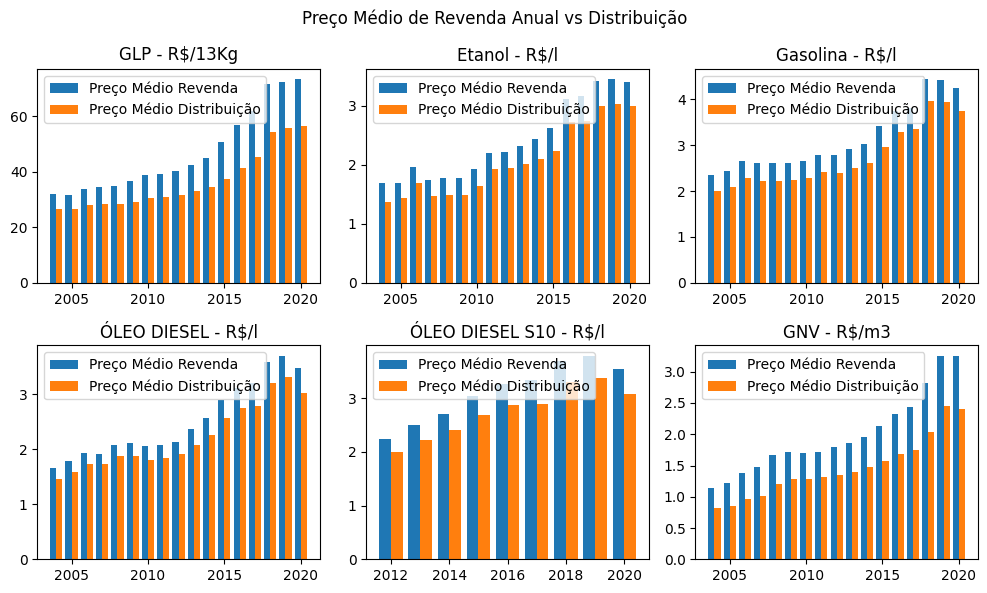

In [34]:
#Preço Médio de Revenda Anual vs Distribuição - Plot
fig, axs = plt.subplots(2, 3, figsize=(10, 6), layout='constrained')
fig.suptitle('Preço Médio de Revenda Anual vs Distribuição')

axs[0,0].bar(anos-0.2,glp.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0,0].bar(anos+0.2,glp.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0,0].legend()
axs[0,0].set_title('GLP - R$/13Kg')

axs[0, 1].bar(anos-0.2,etanol.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0, 1].bar(anos+0.2,etanol.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0, 1].legend()
axs[0, 1].set_title('Etanol - R$/l')

axs[0, 2].bar(anos-0.2,gasolina.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[0, 2].bar(anos+0.2,gasolina.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[0, 2].legend()
axs[0, 2].set_title('Gasolina - R$/l')

axs[1, 0].bar(anos-0.2,diesel.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 0].bar(anos+0.2,diesel.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 0].legend()
axs[1, 0].set_title('ÓLEO DIESEL - R$/l')

axs[1, 1].bar(anos_ds10-0.2,diesels10.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 1].bar(anos_ds10+0.2,diesels10.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 1].legend()
axs[1, 1].set_title('ÓLEO DIESEL S10 - R$/l')

axs[1, 2].bar(anos-0.2,gnv.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean(),0.4,label = 'Preço Médio Revenda')
axs[1, 2].bar(anos+0.2,gnv.groupby('ano_inicial')['PREÇO MÉDIO DISTRIBUIÇÃO'].mean(),0.4, label= 'Preço Médio Distribuição')
axs[1, 2].legend()
axs[1, 2].set_title('GNV - R$/m3')


plt.tight_layout()
plt.show()

Os preços médios de Revenda e Distribuição crescem de forma linear e conjunta, sendo que GNV e GLP apresentam um crescimento linear, porém os preços médios de Revenda e Distribuição não crescem de forma conjunta tendo uma disparidade entre esses dois.

1. *Etanol:* A distribuição de preços médios de revenda anual de Etanol é um exemplo do que deveria ser o ideal. Os preços de revenda deveriam ser maiores que os preços de distribuição, ou crescerem de forma conjunta.

2. *GNV:* Os preços médios de GNV já apresentam um crescimento linear a partir de 2014 para Distribuição e Revenda, porém, a partir de 2018 essa disparidade se torna mais visível por conta do preço médio de Revenda e Distribuição ter uma diferença média de R$ 0,81 sendo que de 2014 a 2017 era em média R$ 0,60 esta diferença. No caso do GNV a diferença entre os preços médios de distribuição e revenda se dá, em sua maior parte, pela oferta e procura. Com o aumento de motoristas por aplicativos de transportes, como Uber e 99, aumenta também a procura por um combustível mais barato, e o GNV, que já era aliado dos taxista, agora tem mais alguns novos amigos

3. *GLP:* Os preços médios de GLP também já apresentam um crescimento linear a partir de 2014 para Distribuição e Revenda até 2017, com diferença média de R$ 12,60, porém, entre 2018 até 2020 essa disparidade se torna mais desequilibrada por conta do preço médio de Revenda e Distribuição ter uma diferença média de R$ 18,56 neste período.

# Conclusão
